In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn
from scipy import arange
from scipy.signal import argrelextrema
import scipy.io as sio
from scipy.fftpack import fft, ifft
from statsmodels import api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pyplot import MultipleLocator
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


In [ ]:
def load_data() -> pd.DataFrame:

  df = pd.read_excel('d1.xlsx')
  df.columns = ['Date', 'NOx']
  df = df.dropna(subset=['NOx'])

  return df

In [ ]:
data = load_data()
#data = data[data.Date < '20151231']
data = data.NOx.values

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Autocorrelation')

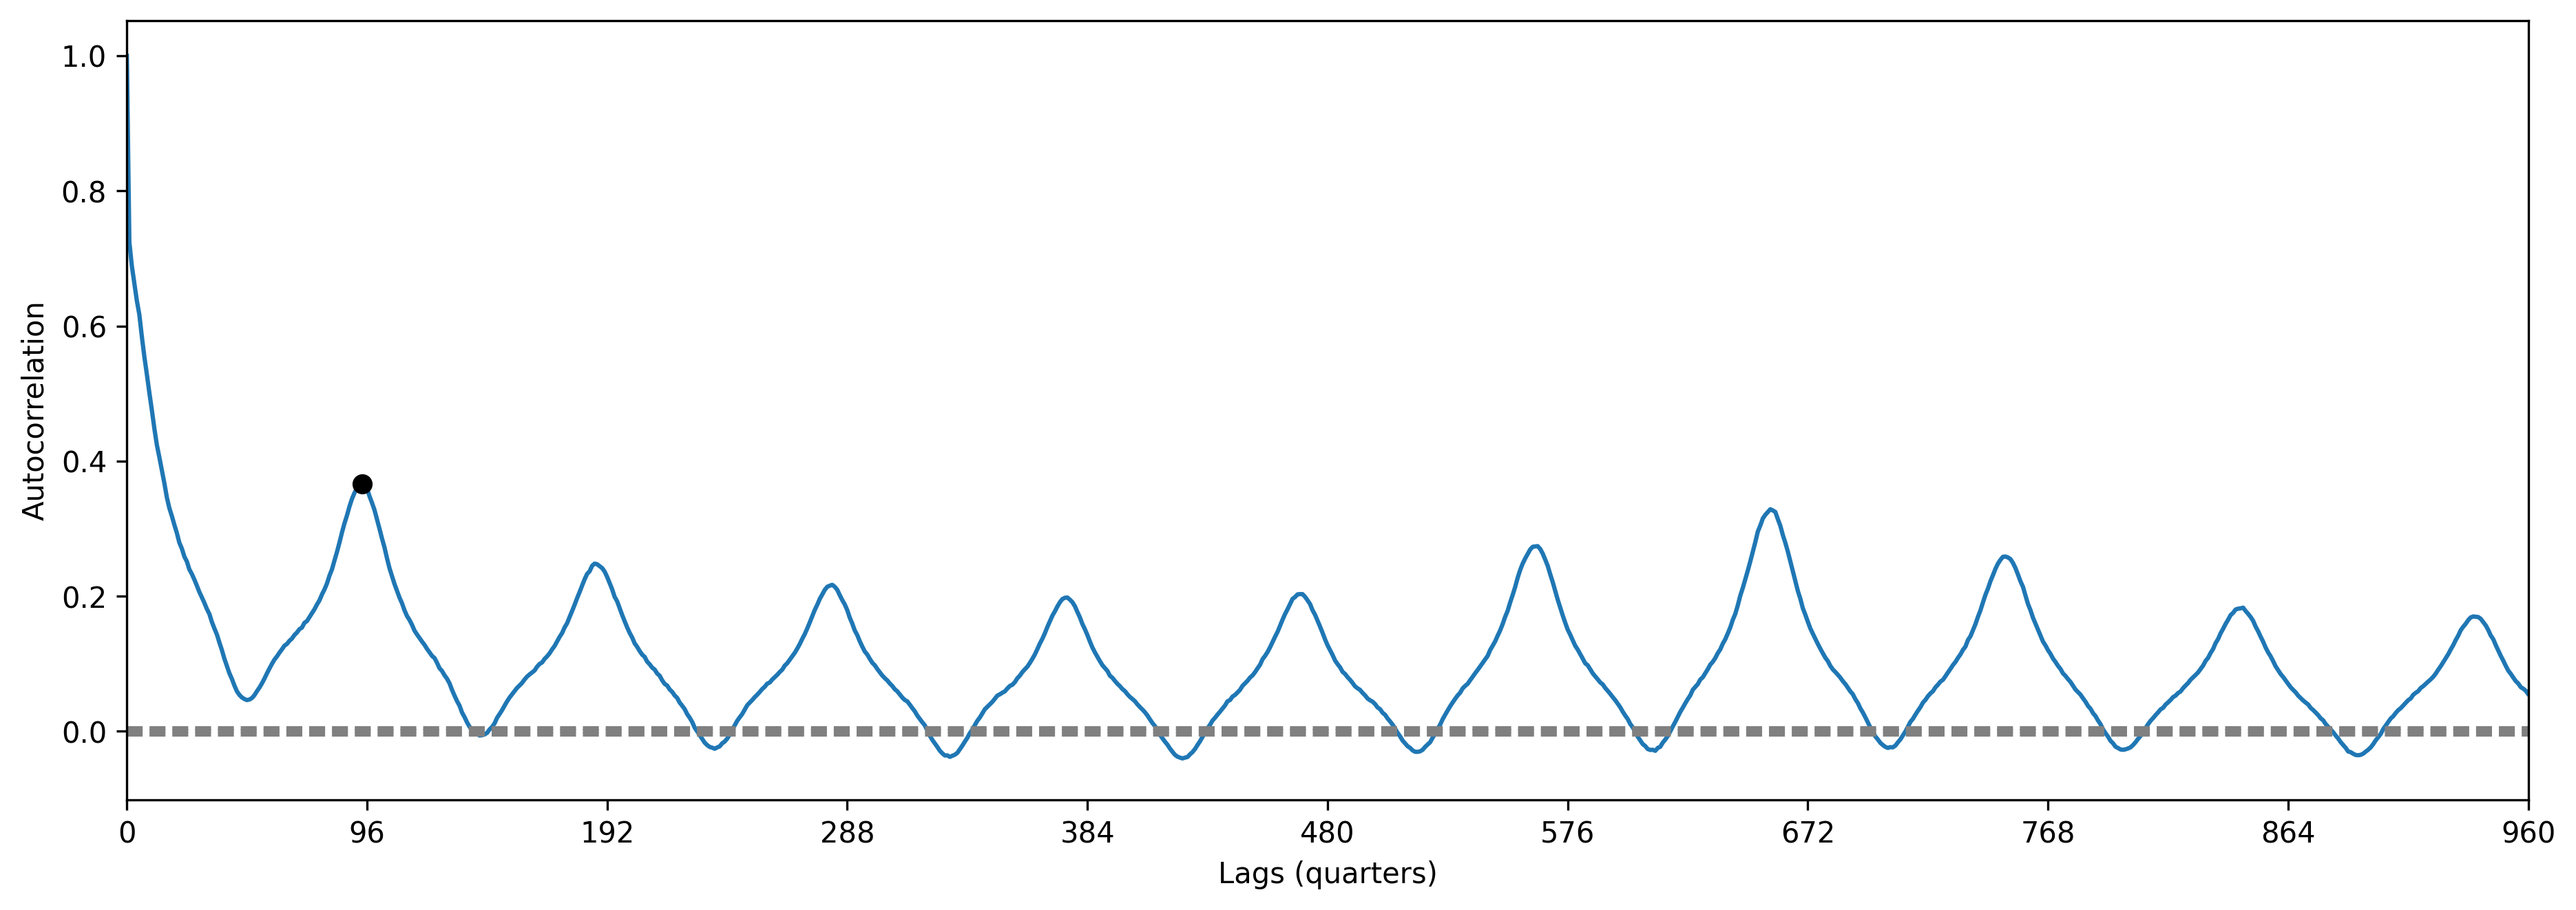

In [ ]:
acf = sm.tsa.acf(data, nlags=len(data))
plt.figure(figsize = (15, 5), dpi = 300)
lag = arange(len(data))
plt.plot(lag, acf)

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')

temp=acf[50:960]
local_max=np.argmax(temp)+50
plt.plot(local_max, acf[local_max], 'ko')

x_major_locator=MultipleLocator(96)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.xlim((0, 960))
plt.xlabel('Lags (quarters)')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Partial Autocorrelation')

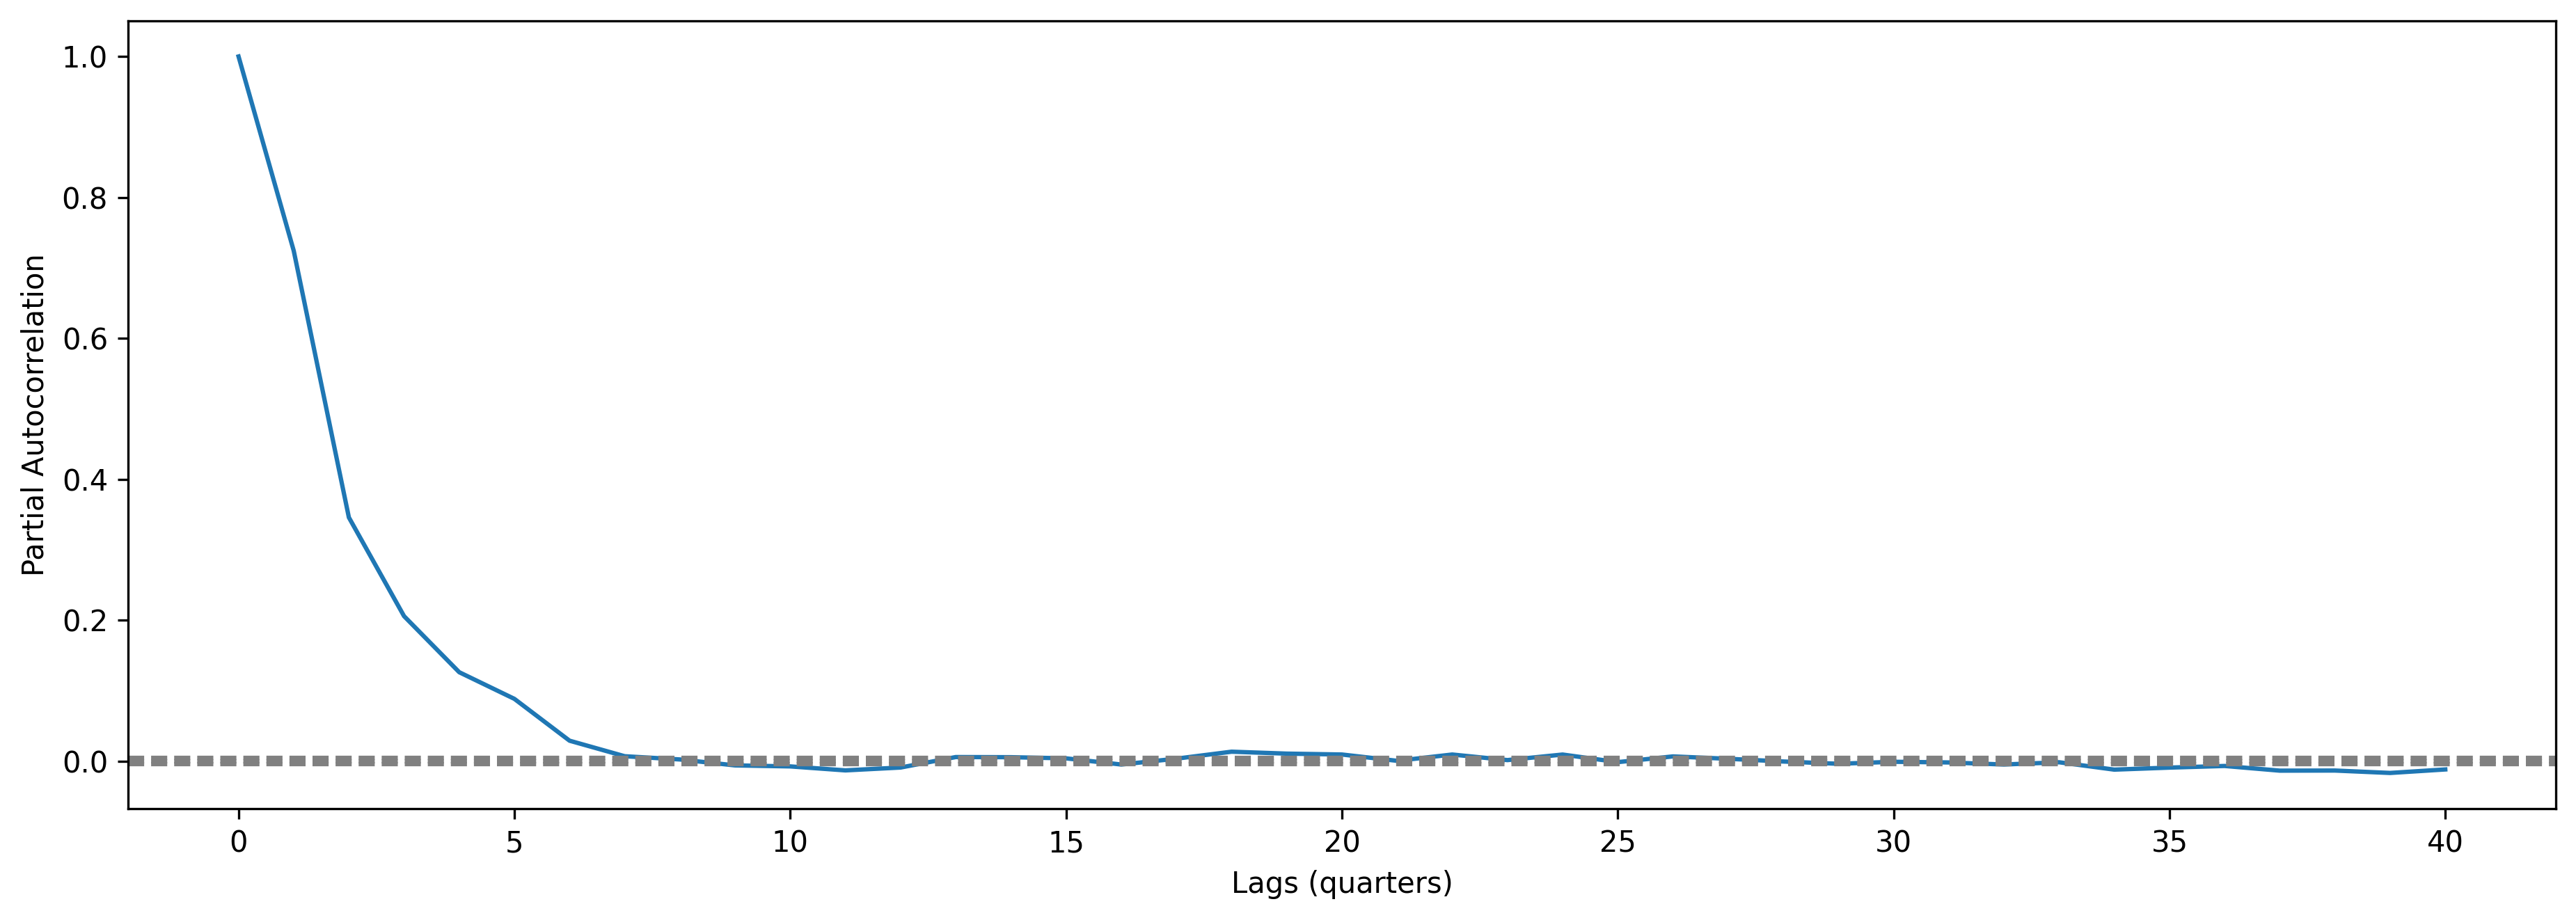

In [ ]:
pacf = sm.tsa.pacf(data, method = 'ols')
plt.figure(figsize = (15, 5), dpi = 300)
plt.plot(pacf)

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')

plt.xlabel('Lags (quarters)')
plt.ylabel('Partial Autocorrelation')

# **ACF拖尾，PACF截尾，AR（7）或ARMA（7，0）**
